# **Positional Encoding**

**Let's First Import The Important Libraries for the Positional Encoding Class**

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import numpy as np

**If you make the class like below, then you will become a master in Positional encoding. I know you will not understand it by just looking at it, so I split it into smaller parts so you will understand. But first, see the class and observe it for 2 minutes, then we'll split it into easier parts so we can understand it.**

# **Positional Encoding Class**

In [2]:
# Creating the Positional Encoding
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, seq_len: int, dropout: float) -> None:
        super().__init__()
        self.d_model = d_model # Dimensionality of the model
        self.seq_len = seq_len # Maximum sequence length
        self.dropout = nn.Dropout(dropout) # Dropout layer to prevent overfitting

        # Creating a positional encoding matrix of shape (seq_len, d_model) filled with zeros
        pe = torch.zeros(seq_len, d_model)

        # Creating a tensor representing positions (0 to seq_len - 1)
        position = torch.arange(0, seq_len, dtype = torch.float).unsqueeze(1) # Transforming 'position' into a 2D tensor['seq_len, 1']

        # Creating the division term for the positional encoding formula
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        # Apply sine to even indices in pe
        pe[:, 0::2] = torch.sin(position * div_term)
        # Apply cosine to odd indices in pe
        pe[:, 1::2] = torch.cos(position * div_term)

        # Adding an extra dimension at the beginning of pe matrix for batch handling
        pe = pe.unsqueeze(0)

        # Registering 'pe' as buffer. Buffer is a tensor not considered as a model parameter
        self.register_buffer('pe', pe)

    def forward(self,x):
        # Addind positional encoding to the input tensor X
        x = x + (self.pe[:, :x.shape[1], :]).requires_grad_(False)
        return self.dropout(x) # Dropout for regularization

**this class corresponds to the following part of the transformer**

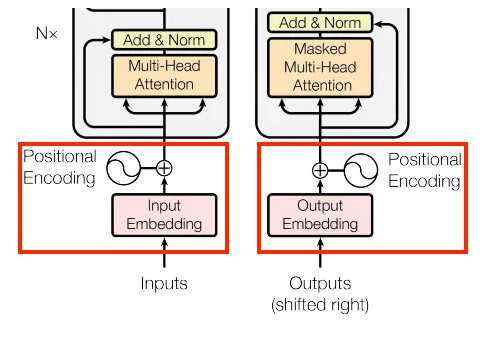

when receiving and treating an input, a transformer has no sense of order as it looks at the sequence as a whole , in opposition to what RNNs do.we therefore need to add a hint to temporal order so that the transformer can learn dependencies

# **Forget Upper Class For a Moment**

Let's set aside the upper class for now. We'll code it from scratch, starting from basic to advanced concepts. I request you to please open your Google Colab or whichever environment you're using and begin coding with me. From this point onward, we'll temporarily ignore the upper class and focus on building it from the ground up.

# **max_sequence_length**

**Maximum length of a sequence to expect**

It simply means the total number of words in our sequence. Like in this sentence ("**I love transformer for everything but Positional Encodings really Sucks**"), in this sentence, you can see there are 10 words and that's its max_sequence length. But in PyTorch, as you know, indexing starts from 0, so we can say that we have 10 words in our sequence but with 0,1,2,3,4,5,6,7,8,9 indexing.

In [3]:
max_sequence_length=10   #how many words are in your sequence(data)

So, for here we are making a variable with max_sequence_length, and as our sentence has 10 words, so we are assigning here 10 max_sequence lengths.

# **Positional Encoding Math**


Let's first see the Mathematical Formula of Positional Encoding For Transformers. This formula is written by Google's team in the "Attention is All You Need" research paper: :https://arxiv.org/pdf/1706.03762.pdf

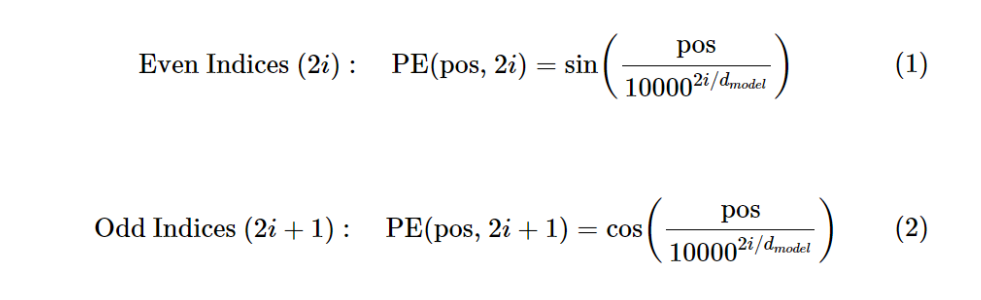

**PE (p, i)** is the positional encoding for position p and dimension i,

**p** is the position, and <br>
**i** is the dimension. <br>
**d_model** is the dimension of the model's input embeddings.

For each position **p** in the sequence, and for each dimension ***i*** in the positional encoding vector, the encoding uses sine for even **i** and cosine for odd **i**.

# **Let's First Breakdown the Formula:**

 **d_model:** Let's first see what is d_model, as you see below in positional encoding formula.



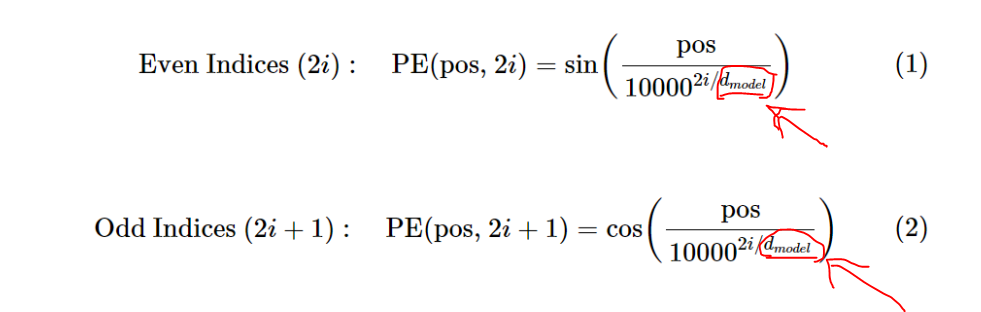

 **d_model** is the dimensionality of the model’s embeddings. In "**Attention is All You Need**" paper, they have d_model as **512**, but for simplicity, we are taking d_model = **6**.

In [4]:
d_model=6     #dimension of word, which we are getting from embedding like wordtovec, like 512 etc , but here for simplicity we are taking 6

**Pos:**

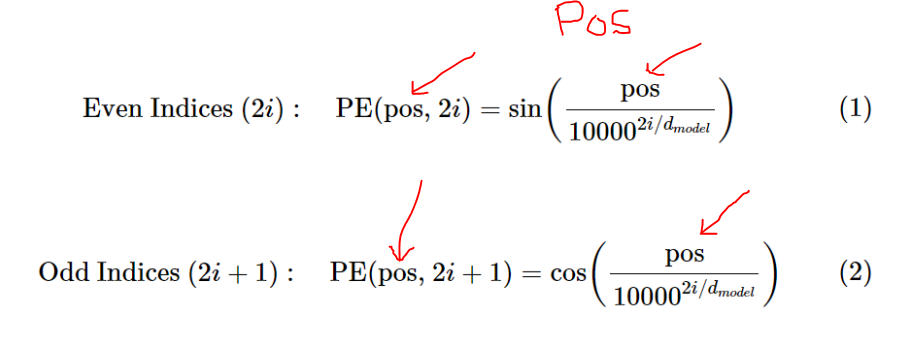

**pos:** Represents the word’s position in the sequence. **pos** is the position of the element in the sequence.

Like as we know our sentence ("**I love transformer for everything but Positional Encodings really Sucks**") has positions in the sequence, like (i=0, love=1, transformer=2, for=3, everything=4, but=5, Positional=6, Encodings=7, really=8, Sucks=9).

**pos** represents the word’s position in the sequence it will be between **0**(because in Python index starts from **0**, to the length of the sequence (like the total numbers in the sequence).

In [5]:
pos=torch.arange(max_sequence_length,dtype=torch.float).reshape(max_sequence_length,1) #as we know our max_sequence _length is 10
pos

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

# **i:**

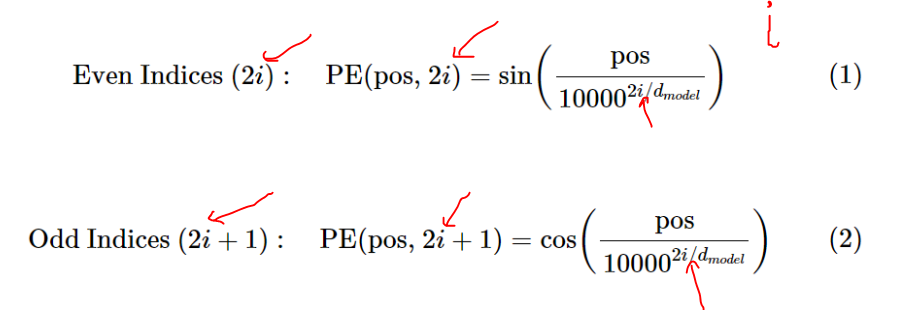

**i corresponds to the specific dimension within the embeddings.**

**or**

i refers to the dimension within the positional encoding vector.

**i (Dimension within the Embeddings):** The variable i corresponds to each specific dimension within the embeddings. It's a factor in the calculation of the positional encoding for each word, playing a role in determining the sine and cosine values used to generate the positional encodings. This differentiation by even and odd indices of i (using sine for even and cosine for odd indices) helps to create a unique positional encoding for each word.
The concept of i being an index within the embedding's dimensions introduces variation in the positional encoding's sine and cosine waves, contributing to the model's ability to discern the relative or absolute position of tokens in the sequence.

# **10000:Why do we need the denominator to be 10000?**

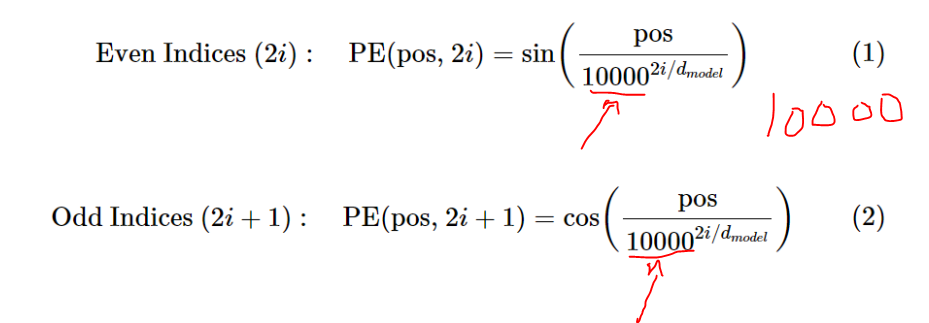

**The choice of 10000 as the denominator is crucial in shaping the frequencies and cyclic repetitions of the positional encodings. If the value were smaller, the frequencies would be higher, resulting in faster cyclic repetitions. However, this would also increase the likelihood of positional encodings for different positions being similar. On the other hand, a larger value for 100000 ensures uniqueness among positional encodings for different positions**


 **Even_i** : Means even index

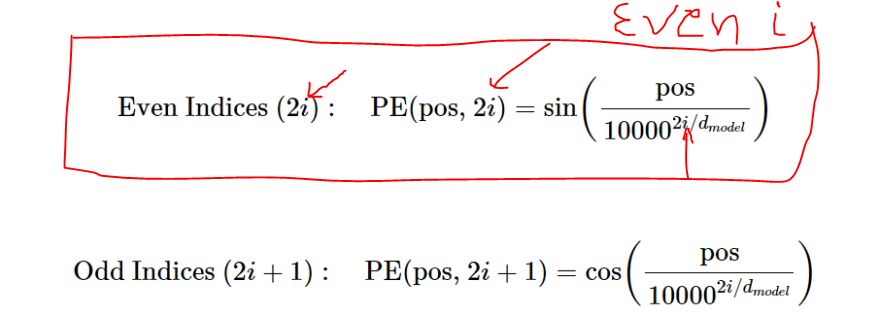

In [7]:
d_model=6
even_i=torch.arange(0,d_model,2).float() #even_i means even index
even_i

tensor([0., 2., 4.])

**As you can see, the arange function starts from 0 and ends at d_model, with a step size of 2. Therefore, it will only generate values that are even multiples of 2 within that range.**

**Even denominator**

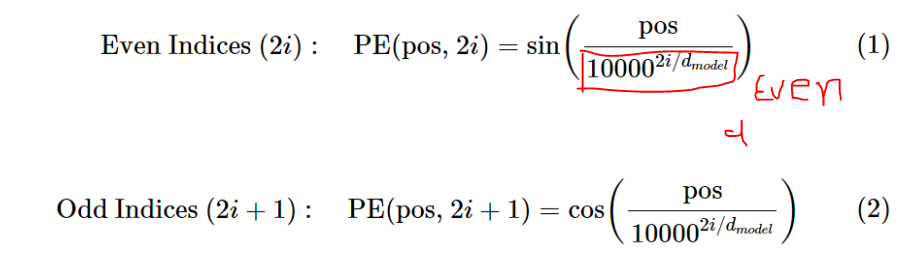

In [8]:
even_denominator=torch.pow(10000,even_i/d_model)  # denominator of even_i (no need to add 2i , just add i , because 2 is just referencing that this is even)
even_denominator

tensor([  1.0000,  21.5443, 464.1590])

**Odd_i**

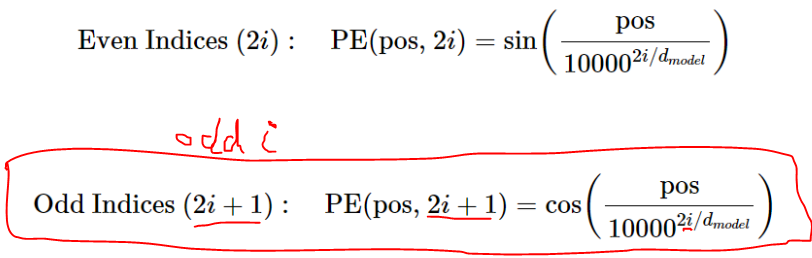

In [9]:
odd_i=torch.arange(1,d_model,2).float() #odd_i means odd index
odd_i

tensor([1., 3., 5.])

**The arange function, when configured to start from 1 and end at d_model, with a step size of 2, is specifically designed to generate values that are odd within the specified range.**

 **Even Denominator:**

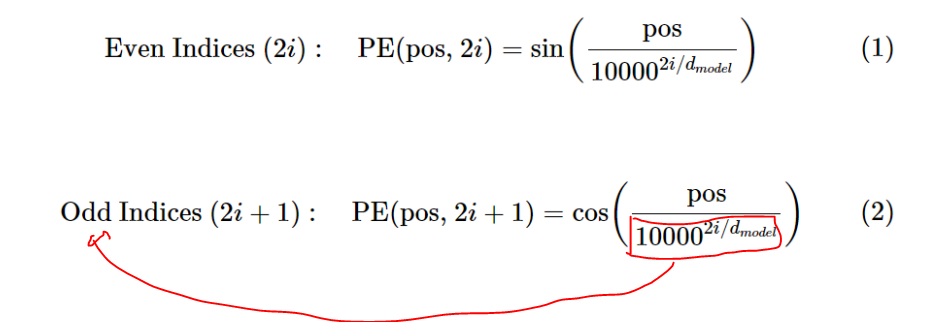

In [10]:
odd_denominator=torch.pow(10000,(odd_i-1)/d_model)
odd_denominator

tensor([  1.0000,  21.5443, 464.1590])

**As observed, both even_denominator and odd_denominator are the same, indicating that we can use either one for our calculations. Therefore, we'll simply use denominator = even_denominator.**

In [11]:
even_denominator ,odd_denominator

(tensor([  1.0000,  21.5443, 464.1590]),
 tensor([  1.0000,  21.5443, 464.1590]))

In [12]:
denominator=even_denominator

**PE:**

pe: A tensor filled with zeros, which will be populated with positional encodings.

**PE(pos, i) represents the positional encoding at position 'pos' in the sequence and hidden dimension 'i'.**

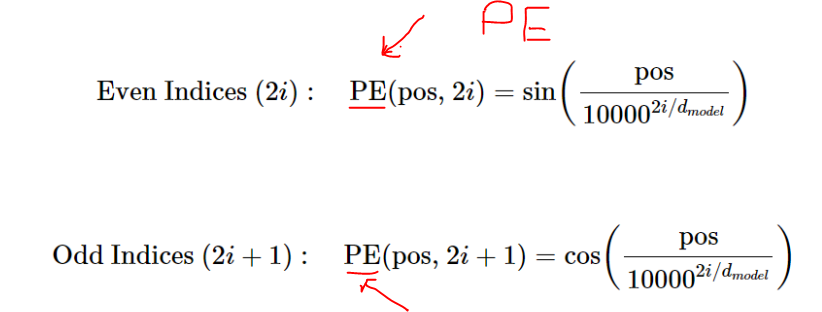

PE(pos,i) represents the position encoding at the position pos in the sequence ,and  hidden dimensions ,are added to the original input features (in the transformer visulization above , se "Positional encodings"), and constitute the position information .we distinguish between even (i mod 2 =0) and uneven means odd(i mod2=1) hidden dimensionalities where we apply a sine/cosine respectively.the intuition behind his encoding is that you can represent PE(pos+k,:) as a linear function of PE(pos:,), which might allow the model to easily attend to relatibve positions.the wavelengths in different dimensions range from 2π to 10000.2π

** **

**now we have everything like,pos,even_i,odd_i,denominator, now lets use sin for evens,and cos for odds**

# **Even Positional Encoding**

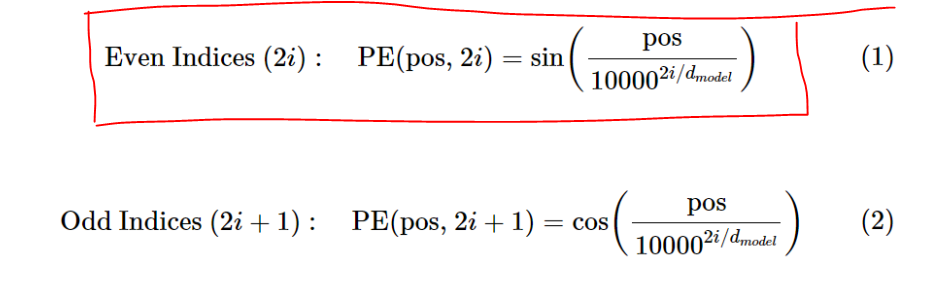

In [13]:
even_PE=torch.sin(pos/denominator)
even_PE

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.8415,  0.0464,  0.0022],
        [ 0.9093,  0.0927,  0.0043],
        [ 0.1411,  0.1388,  0.0065],
        [-0.7568,  0.1846,  0.0086],
        [-0.9589,  0.2300,  0.0108],
        [-0.2794,  0.2749,  0.0129],
        [ 0.6570,  0.3192,  0.0151],
        [ 0.9894,  0.3629,  0.0172],
        [ 0.4121,  0.4057,  0.0194]])

The even positional encoding is calculated using the sine function applied to the positional indices divided by the denominator calculated earlier.

you can see these pics to understand how  Positional encodings......

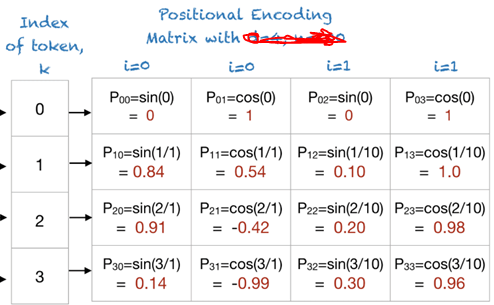

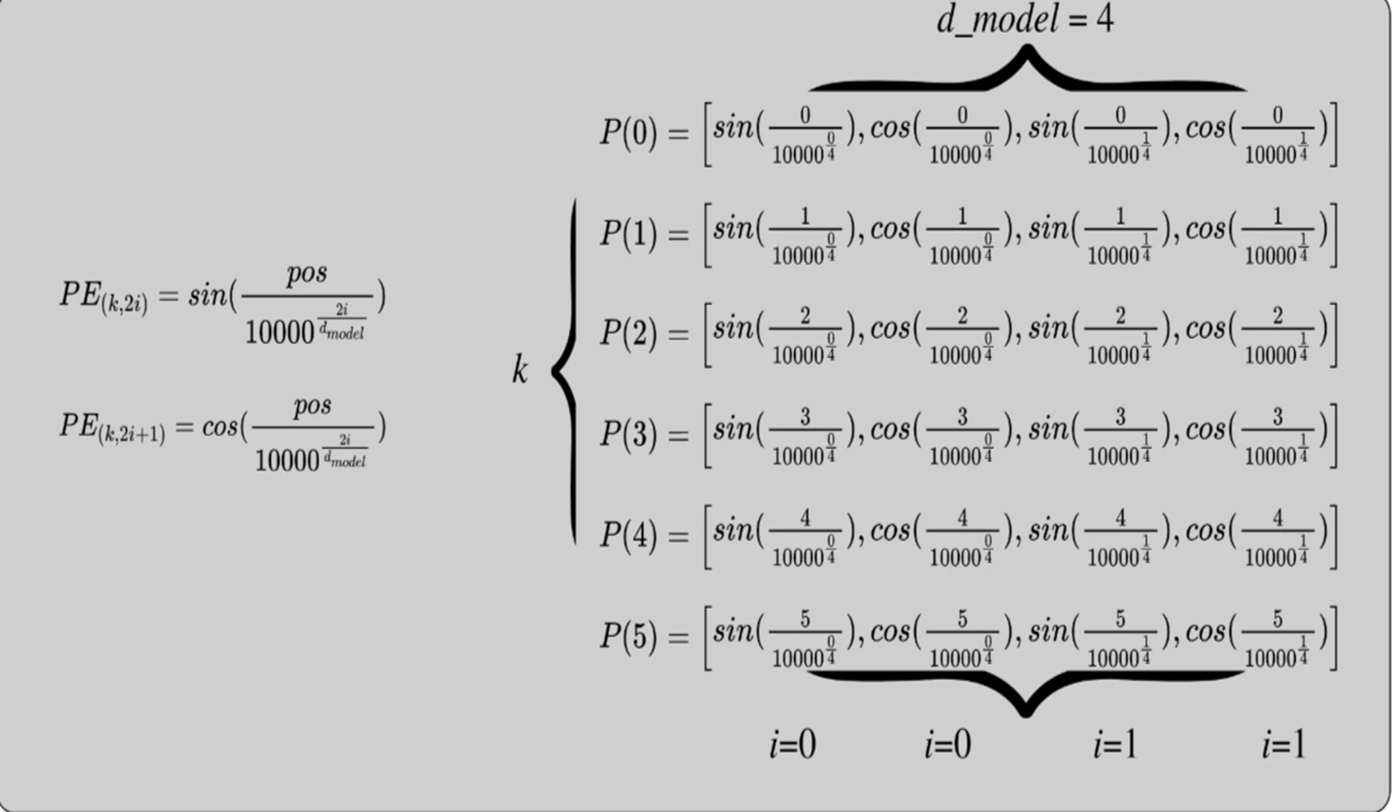

**i** corresponds to the dimension within the embedding
with a single value of **i** maps to both **sine** and **cosine** functions
**d_model** is the dimensionality of the model’s embeddings


In [14]:
even_PE.shape

torch.Size([10, 3])

**The shape of the even positional encoding tensor is [10, 3], where 10 represents the sequence length (max_sequence_length) and 3 represents the dimensionality of the model's embeddings (d_model)**

# **Odd Positional Encodings**

In [15]:
odd_PE=torch.cos(pos/denominator)
odd_PE

tensor([[ 1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9989,  1.0000],
        [-0.4161,  0.9957,  1.0000],
        [-0.9900,  0.9903,  1.0000],
        [-0.6536,  0.9828,  1.0000],
        [ 0.2837,  0.9732,  0.9999],
        [ 0.9602,  0.9615,  0.9999],
        [ 0.7539,  0.9477,  0.9999],
        [-0.1455,  0.9318,  0.9999],
        [-0.9111,  0.9140,  0.9998]])

Similarly, the odd positional encoding is calculated using the cosine function applied to the positional indices divided by the denominator.

In [16]:
odd_PE.shape

torch.Size([10, 3])

The shape of the odd positional encoding tensor is also [10, 3], indicating the same dimensions as the even positional encoding.

# **Combining Even and Odd Positional Encodings**

In [17]:
stacked=torch.stack([even_PE,odd_PE],dim=2 )
stacked

tensor([[[ 0.0000,  1.0000],
         [ 0.0000,  1.0000],
         [ 0.0000,  1.0000]],

        [[ 0.8415,  0.5403],
         [ 0.0464,  0.9989],
         [ 0.0022,  1.0000]],

        [[ 0.9093, -0.4161],
         [ 0.0927,  0.9957],
         [ 0.0043,  1.0000]],

        [[ 0.1411, -0.9900],
         [ 0.1388,  0.9903],
         [ 0.0065,  1.0000]],

        [[-0.7568, -0.6536],
         [ 0.1846,  0.9828],
         [ 0.0086,  1.0000]],

        [[-0.9589,  0.2837],
         [ 0.2300,  0.9732],
         [ 0.0108,  0.9999]],

        [[-0.2794,  0.9602],
         [ 0.2749,  0.9615],
         [ 0.0129,  0.9999]],

        [[ 0.6570,  0.7539],
         [ 0.3192,  0.9477],
         [ 0.0151,  0.9999]],

        [[ 0.9894, -0.1455],
         [ 0.3629,  0.9318],
         [ 0.0172,  0.9999]],

        [[ 0.4121, -0.9111],
         [ 0.4057,  0.9140],
         [ 0.0194,  0.9998]]])

**You've used torch.stack to combine the even and odd positional encoding vectors, specifying dim=2 to stack them along a new dimension, effectively interleaving them.**

In [18]:
stacked.shape

torch.Size([10, 3, 2])

The result is a tensor with shape [10, 3, 2], which represents 10 positions in the sequence, each with 3 dimensions, and each dimension having a pair of sine and cosine values.

In [19]:
PE=torch.flatten(stacked,start_dim=1,end_dim=2) #flatten converts multi dimensional to 1D, mentioning the dim converts into specific dimensions
PE

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

**torch.flatten** starting from **dim=1** to **dim=2**, which flattens the last two dimensions. This step is crucial as it transforms the tensor from its stacked form into a format where each position in the sequence is represented by a single vector of length 6 (d_model), aligning with the model's expected input dimensionality.

In [20]:
PE.shape

torch.Size([10, 6])

The final positional encoding tensor has a shape of [10, 6], perfectly matching the input requirements for a sequence of 10 items, each with 6 features. This shape confirms that each position in the sequence is now uniquely encoded with a combination of sine and cosine values, allowing the model to understand and utilize positional information.

**Now, let's construct the Positional Encoding mechanism in a structured manner by defining a class for it:**

as you can see everything is same as we discussed earlier , we just add it in class, we will explain our original class , wait for few moments

In [21]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model, max_sequence_length):
        super().__init__()
        self.max_sequence_length = max_sequence_length
        self.d_model = d_model

    def forward(self):
        even_i = torch.arange(0, self.d_model, 2).float()
        denominator = torch.pow(10000, even_i/self.d_model)
        position = torch.arange(self.max_sequence_length).reshape(self.max_sequence_length, 1)
        even_PE = torch.sin(position / denominator)
        odd_PE = torch.cos(position / denominator)
        stacked = torch.stack([even_PE, odd_PE], dim=2)
        PE = torch.flatten(stacked, start_dim=1, end_dim=2)
        return PE

# **Why we add sin and cos heren?**

The use of sine and cosine functions with different frequencies ensures that different positions have different representations. - The sin terms create a cycle over positions, with a frequency that decreases exponentially. This means that the positional encoding for each dimension captures a different part of the cycle. - The cos terms create another cycle with the same properties but with an offset phase. The choice of 10,000 as the base for the exponential function and the use of both sine and cosine functions are empirical choices that have been found to work well in practice.
First of all, the output of sine and cosine is in [-1, 1], which is normalized. It won't grow to an unmanageable size like integers would. Second, no additional training has to be done since unique representations are generated for each position.

We apply the sine and cosine functions because it allows the model to determine the position of a word based on the position of other words in the sequence, since for any fixed offset k, PE pos+k can be represented as a linear function of PEpos. This happens due to the properties of sine and cosine functions, where a shift in the input results in a predictable change in the output.

# **Our Main Positional Encoding Class**

In [22]:
# Creating the Positional Encoding
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, max_sequence_length: int, dropout: float) -> None:
        super().__init__()
        self.d_model = d_model # Dimensionality of the model
        self.seq_len = max_sequence_length # Maximum sequence length
        self.dropout = nn.Dropout(dropout) # Dropout layer to prevent overfitting

        # Creating a positional encoding matrix of shape (seq_len, d_model) filled with zeros
        pe = torch.zeros(max_sequence_length, d_model)

        # Creating a tensor representing positions (0 to seq_len - 1)
        position = torch.arange(0, max_sequence_length, dtype = torch.float).unsqueeze(1) # Transforming 'position' into a 2D tensor['seq_len, 1']

        # Creating the division term for the positional encoding formula
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        # Apply sine to even indices in pe
        pe[:, 0::2] = torch.sin(position * div_term)
        # Apply cosine to odd indices in pe
        pe[:, 1::2] = torch.cos(position * div_term)

        # Adding an extra dimension at the beginning of pe matrix for batch handling
        pe = pe.unsqueeze(0)

        # Registering 'pe' as buffer. Buffer is a tensor not considered as a model parameter
        self.register_buffer('pe', pe)

    def forward(self,x):
        # Adding positional encoding to the input tensor X
        x = x + (self.pe[:, :x.shape[1], :]).requires_grad_(False)
        return self.dropout(x) # Dropout for regularization


 The class is defined as a subclass of PyTorch's nn. Module, allowing it to be used as a standard PyTorch layer.

In [23]:
class PositionalEncoding(nn.Module):

Contructor to initialize parameters and variables

In [ ]:
def __init__(self, d_model: int, max_sequence_length: int, dropout: float) -> None:
        super().__init__()
        self.d_model = d_model # Dimensionality of the model
        self.seq_len = max_sequence_length # Maximum sequence length
        self.dropout = nn.Dropout(dropout) # Dropout layer to prevent overfitting

dropou :Applied after adding the positional encoding to the input embeddings to help prevent the model from overfitting during training.

d_model: The dimension of the model's input.

In [ ]:
self.d_model = d_model

max_seq_length: The maximum length of the sequence for which positional encodings are pre-computed.

In [ ]:
self.seq_len = max_sequence_length

pe: A tensor filled with zeros, which will be populated with positional encodings.

In [ ]:
pe = torch.zeros(max_sequence_length, d_model)

position: A tensor containing the position indices for each position in the sequence.

In [ ]:
position = torch.arange(0, max_sequence_length, dtype = torch.float).unsqueeze(1)

div_term: A term used to scale the position indices in a specific way.

In [ ]:
div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

The sine function is applied to the even indices and the cosine function to the odd indices of pe.

In [ ]:
pe[:, 0::2] = torch.sin(position * div_term)
# Apply cosine to odd indices in pe
pe[:, 1::2] = torch.cos(position * div_term)

The forward method simply adds the positional encodings to the input x. It uses the first x.size(1) elements of pe to ensure that the positional encodings match the actual sequence length of x.

In [ ]:
def forward(self,x):
        # Adding positional encoding to the input tensor X
        x = x + (self.pe[:, :x.shape[1], :]).requires_grad_(False)
        return self.dropout(x) # Dropout for regularization

 In addition, we apply dropout to the sums of the embeddings and the positional encodings in both the encoder and decoder stacks. For the base model, we use a rate of Pdrop = 0.1.

In [ ]:
nn.Dropout(dropout)

# **positional encoding matrix**

In [ ]:
# Creating a positional encoding matrix of shape (seq_len, d_model) filled with zeros
pe = torch.zeros(max_sequence_length, d_model)
pe

you can imagine like this , every token has matrix of Positional Embeddings

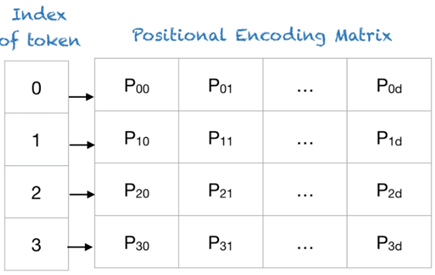

# **Adding positional encoding to the input tensor X**

In [ ]:
        # Adding positional encoding to the input tensor X
        x = x + (self.pe[:, :x.shape[1], :]).requires_grad_(False)

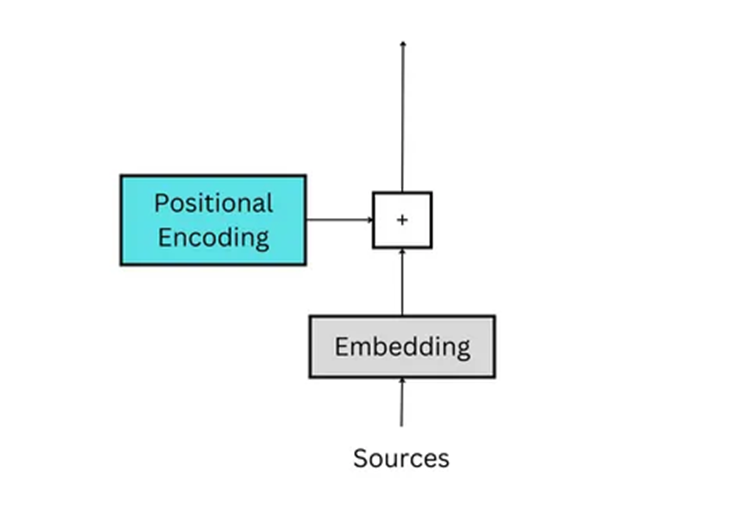

After calculating the positional encoding vectors using the formula above, they are element-wise added to the input embeddings. This addition combines the positional information with the semantic information contained in the embeddings.

**Input_with_positional_encoding** =
**Input_embeddings** **+** **Positional_encoding**


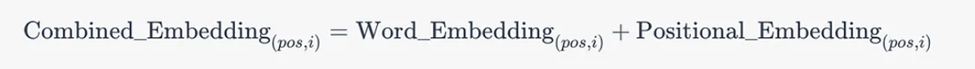

The amalgamation of positional embeddings (PE) and word embeddings (WE) lies at the heart of the Transformer’s ability to grasp sequence information while preserving the semantic meaning of words.
The process of adding positional embeddings to word embeddings can be succinctly expressed through the following equation:
In this equation, pos represents the word’s position in the sequence, and i corresponds to the specific dimension within the embeddings.


Positinal embedding will generate a matrix of similar to embedding matrix. It will create a matrix of dimension sequence length x embedding dimension. For each token(word) in sequence, we will find the embedding vector which is of dimension 1 x 512 and it is added with the correspondng positional vector which is of dimension 1 x 512 to get 1 x 512 dim out for each word/token.
for eg: if we have batch size of 32 and seq length of 10 and let embedding dimension be 512. Then we will have embedding vector of dimension 32 x 10 x 512. Similarly we will have positional encoding vector of dimension 32 x 10 x 512. Then we add both.

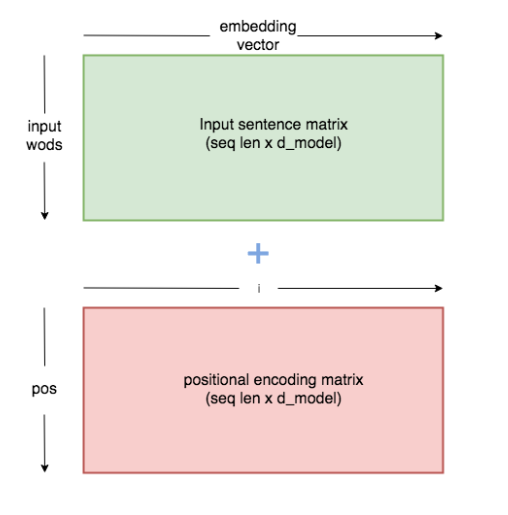

# **self.buffer why here**

In [ ]:
self.register_buffer('pe', pe)

If you have parameters in your model that should be saved and restored in the state_dict, but are not to be trained by the optimizer, you should register them as buffers. Buffers will not be returned in model.parameters(), ensuring that the optimizer does not have a chance to update them.

again, pe is registered as a buffer, which means it will be part of the module's state but will not be considered a trainable parameter.

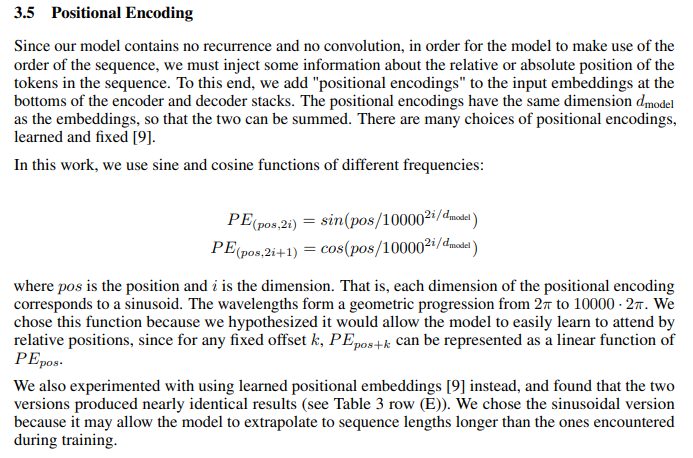